In [1]:
# automatically apply changes in netgen
%load_ext autoreload
%autoreload 2

import random
 # allows performing command-line operations from within Python
from subprocess import call

# tell jupyter notebook to show plots inline (with output)
%matplotlib inline
import pandas as pd
import numpy as np
from scipy.stats.distributions import norm
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# tell whiny modules to shut up about it 
warnings.simplefilter('ignore', np.RankWarning)
warnings.filterwarnings("ignore", module="matplotlib")
warnings.filterwarnings("ignore", module="statsmodels")

# import the netgen
import netgen as ng

In [2]:
ng.setDirectory("networkdebugging")

In [3]:
sweepcount = ng.configureSweep(experiment='ss', popscale=0.75, BaseStim=[3.00], direct=0.85, indirect=0.90,
                  WrongStim = [3.34], RightStim = [3.36], Dynamic=[30.0], STNExtFreq=[3.5],
                  CancelStim=[4.5], CancelDelay = 200, Choices=2, LIPsyn=[0.92], CxSTR=[0.65],
                  M1STR=[0.35], M1Th=[0.05], M1syn = [.7], ThM1=[1.10], stop=[0,1])
sweepcount

2

In [4]:
trialcount = 100

In [7]:
ng.compileAndRunSweep(trialcount,0,sweepcount)

In [5]:
results = ng.readAllTrialResults(trialcount,0,sweepcount)

(0, 50)

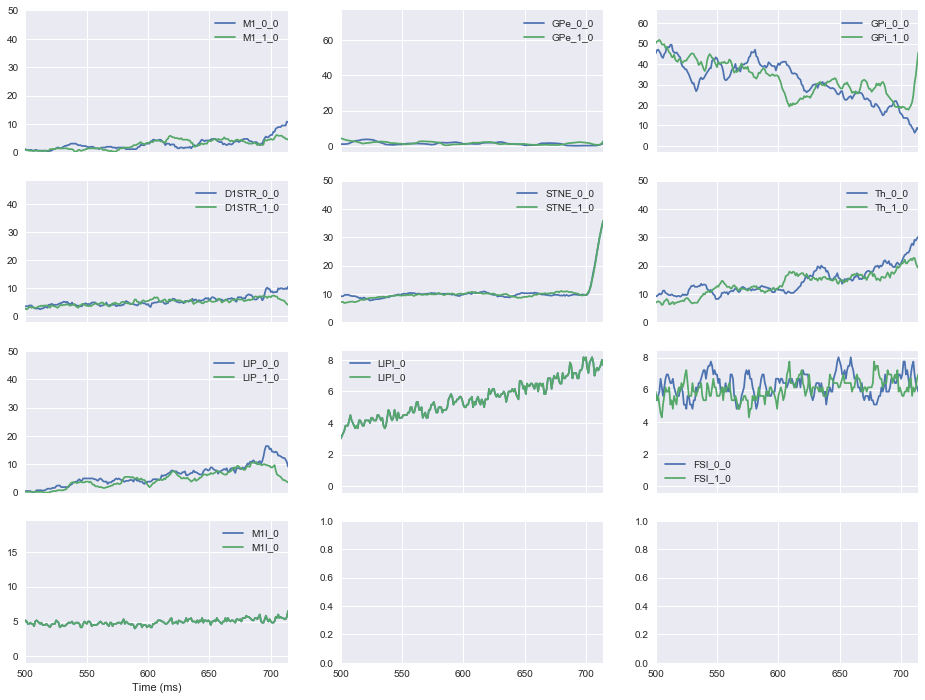

In [10]:
result = results[1][2]

f, (ax1, ax2, ax3, ax4) = plt.subplots(4, 3, figsize=(16,12), sharex=True)
for i in range(0,result['dims']['choices']):
    result['popfreqs'].plot(x='Time (ms)', y='M1_'+str(i)+'_0', ax=ax1[0])
    result['popfreqs'].plot(x='Time (ms)', y='GPe_'+str(i)+'_0', ax=ax1[1])
    result['popfreqs'].plot(x='Time (ms)', y='GPi_'+str(i)+'_0', ax=ax1[2])
    result['popfreqs'].plot(x='Time (ms)', y='D1STR_'+str(i)+'_0', ax=ax2[0])
    result['popfreqs'].plot(x='Time (ms)', y='STNE_'+str(i)+'_0', ax=ax2[1])
    result['popfreqs'].plot(x='Time (ms)', y='Th_'+str(i)+'_0', ax=ax2[2])
    result['popfreqs'].plot(x='Time (ms)', y='LIP_'+str(i)+'_0', ax=ax3[0])
    result['popfreqs'].plot(x='Time (ms)', y='LIPI_0', ax=ax3[1])
    result['popfreqs'].plot(x='Time (ms)', y='FSI_'+str(i)+'_0', ax=ax3[2])
    result['popfreqs'].plot(x='Time (ms)', y='M1I_0', ax=ax4[0])

for ax, axx, axxx, axxxx in zip(ax1, ax2, ax3, ax4):
    #ax.set_xlim(0, ax.get_xlim()[-1])
    #axx.set_xlim(0, axx.get_xlim()[-1])
    #axxx.set_xlim(0, axxx.get_xlim()[-1])
    #axxxx.set_xlim(0, axxxx.get_xlim()[-1])
    #ax.set_xlim(500, 1500)
    #axx.set_xlim(500, 1500)
    #axxx.set_xlim(500, 1500)
    #axxxx.set_xlim(500, 1500)
    ax.set_xlim(500, ax.get_xlim()[-1])
    axx.set_xlim(500, axx.get_xlim()[-1])
    axxx.set_xlim(500, axxx.get_xlim()[-1])
    axxxx.set_xlim(500, axxxx.get_xlim()[-1])

ax1[0].set_ylim(0,50)
ax3[0].set_ylim(0,50)
ax2[1].set_ylim(0,50)
ax2[2].set_ylim(0,50)

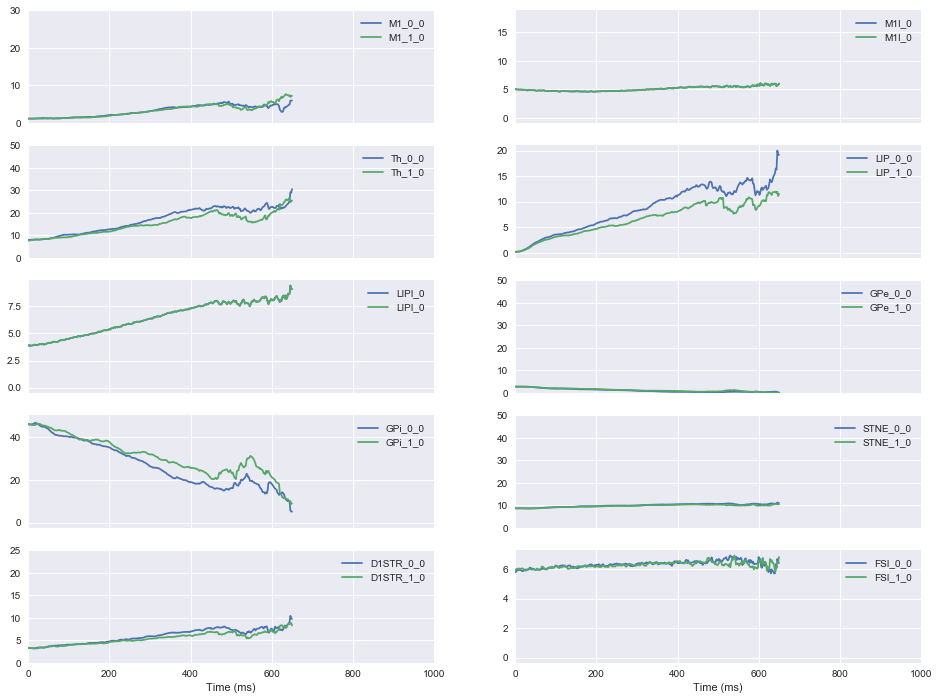

In [12]:
# average of non-stop-signal trials
combined = {}
for i in range(0, trialcount):
    combined[i] = results[0][i]['popfreqs']
panel = pd.Panel(combined)
df_means = panel.mean(axis=0)
f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 2, figsize=(16,12), sharex=True)
for i in range(0,results[0][0]['dims']['choices']):
    df_means.plot(x='Time (ms)', y='M1_'+str(i)+'_0', ax=ax1[0])
    df_means.plot(x='Time (ms)', y='M1I_0', ax=ax1[1])
    df_means.plot(x='Time (ms)', y='Th_'+str(i)+'_0', ax=ax2[0])
    df_means.plot(x='Time (ms)', y='LIP_'+str(i)+'_0', ax=ax2[1])
    df_means.plot(x='Time (ms)', y='LIPI_0', ax=ax3[0])
    df_means.plot(x='Time (ms)', y='GPe_'+str(i)+'_0', ax=ax3[1])
    df_means.plot(x='Time (ms)', y='GPi_'+str(i)+'_0', ax=ax4[0])
    df_means.plot(x='Time (ms)', y='STNE_'+str(i)+'_0', ax=ax4[1])
    df_means.plot(x='Time (ms)', y='D1STR_'+str(i)+'_0', ax=ax5[0])
    df_means.plot(x='Time (ms)', y='FSI_'+str(i)+'_0', ax=ax5[1])

for ax, axx, axxx, axxxx, axxxxx  in zip(ax1, ax2, ax3, ax4, ax5):
    #ax.set_xlim(500, ax.get_xlim()[-1])
    #axx.set_xlim(500, axx.get_xlim()[-1])
    #axxx.set_xlim(500, axxx.get_xlim()[-1])
    #axxxx.set_xlim(500, axxxx.get_xlim()[-1])
    #axxxxx.set_xlim(500, axxxxx.get_xlim()[-1])
    ax.set_xlim(500, 1000)
    axx.set_xlim(500, 1000)
    axxx.set_xlim(500, 1000)
    axxxx.set_xlim(500, 1000)
    axxxxx.set_xlim(500, 1000)
    ax.set_xticklabels([200*i for i in range(0,10)])

ax1[0].set_ylim(0,30)
ax3[1].set_ylim(0,50)
ax2[0].set_ylim(0,50)
ax4[1].set_ylim(0,50)
ax5[0].set_ylim(0,25)

locs,labels = plt.xticks()
#plt.xticks(locs, map(lambda x: "%g" % x, locs-500))
#plt.text(0.92, -0.07, "+%g" % 500, fontsize=10, transform = plt.gca().transAxes)

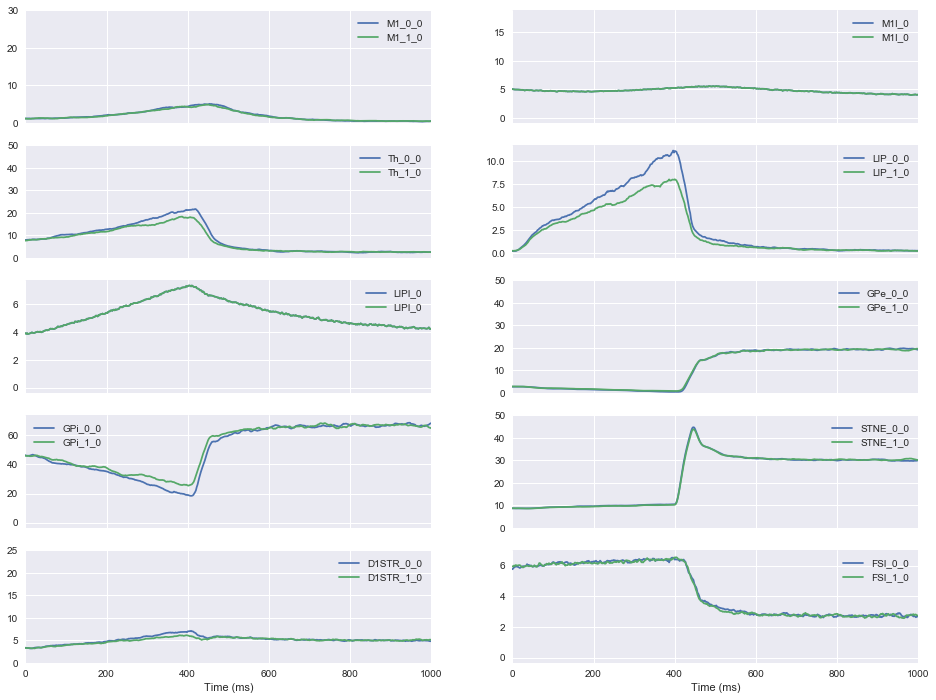

In [13]:
# average of stop-signal trials
combined = {}
for i in range(0, trialcount):
    combined[i] = results[1][i]['popfreqs']
panel = pd.Panel(combined)
df_means = panel.mean(axis=0)
f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 2, figsize=(16,12), sharex=True)
for i in range(0,results[0][0]['dims']['choices']):
    df_means.plot(x='Time (ms)', y='M1_'+str(i)+'_0', ax=ax1[0])
    df_means.plot(x='Time (ms)', y='M1I_0', ax=ax1[1])
    df_means.plot(x='Time (ms)', y='Th_'+str(i)+'_0', ax=ax2[0])
    df_means.plot(x='Time (ms)', y='LIP_'+str(i)+'_0', ax=ax2[1])
    df_means.plot(x='Time (ms)', y='LIPI_0', ax=ax3[0])
    df_means.plot(x='Time (ms)', y='GPe_'+str(i)+'_0', ax=ax3[1])
    df_means.plot(x='Time (ms)', y='GPi_'+str(i)+'_0', ax=ax4[0])
    df_means.plot(x='Time (ms)', y='STNE_'+str(i)+'_0', ax=ax4[1])
    df_means.plot(x='Time (ms)', y='D1STR_'+str(i)+'_0', ax=ax5[0])
    df_means.plot(x='Time (ms)', y='FSI_'+str(i)+'_0', ax=ax5[1])

for ax, axx, axxx, axxxx, axxxxx  in zip(ax1, ax2, ax3, ax4, ax5):
    #ax.set_xlim(500, ax.get_xlim()[-1])
    #axx.set_xlim(500, axx.get_xlim()[-1])
    #axxx.set_xlim(500, axxx.get_xlim()[-1])
    #axxxx.set_xlim(500, axxxx.get_xlim()[-1])
    #axxxxx.set_xlim(500, axxxxx.get_xlim()[-1])
    ax.set_xlim(500, 1000)
    axx.set_xlim(500, 1000)
    axxx.set_xlim(500, 1000)
    axxxx.set_xlim(500, 1000)
    axxxxx.set_xlim(500, 1000)
    ax.set_xticklabels([200*i for i in range(0,10)])

ax1[0].set_ylim(0,30)
ax3[1].set_ylim(0,50)
ax2[0].set_ylim(0,50)
ax4[1].set_ylim(0,50)
ax5[0].set_ylim(0,25)

locs,labels = plt.xticks()
#plt.xticks(locs, map(lambda x: "%g" % x, locs-500))
#plt.text(0.92, -0.07, "+%g" % 500, fontsize=10, transform = plt.gca().transAxes)

In [18]:
decisions = []
for sn in range(sweepcount):
    decisions.append([])
    for result in results[sn]:
        decisions[sn].append(ng.findOutputs(result)['decision made'])

In [20]:
rightreact = []
wrongreact = []
allreact = []
accuracy = []
completed = []
for sn in range(sweepcount):
    rightreact.append([])
    wrongreact.append([])
    allreact.append([])
    for decision in decisions[sn]:
        if decision['pathvals'] is None:
            continue 
        elif decision['pathvals'] == [0]:
            rightreact[sn].append(decision['delay'])
            allreact[sn].append(decision['delay'])
        else:
            wrongreact[sn].append(decision['delay'])
            allreact[sn].append(decision['delay'])
    completed.append((len(rightreact[sn])+len(wrongreact[sn]))/len(decisions[sn]))
    if len(rightreact[sn])+len(wrongreact[sn]) > 0:
        accuracy.append(len(rightreact[sn])/(len(rightreact[sn])+len(wrongreact[sn])))
    else:
        accuracy.append(-1)
        
for sn in range(sweepcount):
    print((sum(rightreact[sn])+sum(wrongreact[sn])) / (len(rightreact[sn]) + len(wrongreact[sn])))

215.345227051
182.327559761


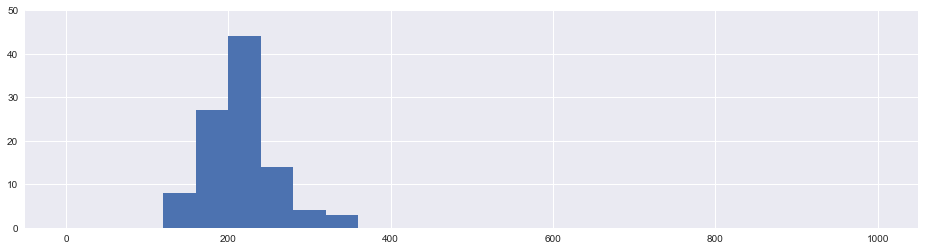

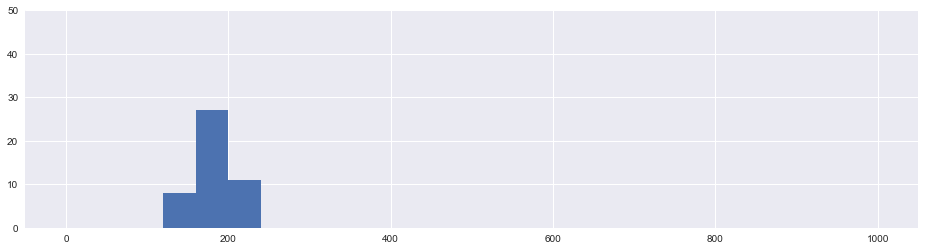

In [23]:
for sn in range(sweepcount):
    #print(results[sn][0]['direct'], results[sn][0]['indirect'])
    f, (ax1) = plt.subplots(1, 1, figsize=(16,4), sharex=True)
    pd.Series(allreact[sn]).hist(bins=25, range=[0,1000], ax=ax1)
    # plt.savefig('/home/mclapp/RTs_direct'+str(results[sn][0]['direct']*100)+'%_i
    ax1.set_ylim(0,50)